# Python Data Visualization Overview
_Pandas, Matplotlib, and Seaborn_ are the three primary libraries used for data visualization when working with Python.  There are other great libraries of course, such as _Pygal_ and _Bokeh_ for making interactive visualizations, but these three should make up the core of what you use, and are the focus of this notebook.

This notebook will also briefly explore _Pandas Profiling_, which is a useful tool for creating quick HTML reports that give you a good overview of the data.  Much of what would traditionally go into exploratory data analysis can be quickly generated from a _Pandas Profiling_ report.

In [1]:
''' Import Dependencies '''
# Import Data Visualization Libraries
import pandas as pd # Pandas 
import seaborn as sns # Seaborn
import matplotlib.pyplot as plt # Matplotlib
from pandas_profiling import ProfileReport # Pandas Profiling

# Import Datasets from SciKit Learn 
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris 

## About SciKit Learn Datasets 
The "toy" datasets available from SciKit Learn are loaded in as something akin to a dictionary using a "load" method that comes with the datasets module.  After instantiating the dataset, you can selectively load the feature data, the target data, a list of feature names, and a description of the dataset.  

In [2]:
''' Load in the datasets from SciKit Learn '''
boston_meta = load_boston()
iris_meta = load_iris()

To see everything in the superset, just run a line of code with the name of the superset.  It'll print out the feature data, the target data, and the description. 

In [3]:
# boston_meta # UNCOMMENT TO SEE EVERYTHING

Let's just selectively examine parts of the Boston Housing superset to get an idea of what we're dealing with.  

In [4]:
print("Boston feature data has shape: ", boston_meta.data.shape)
print("Boston target data has shape: ", boston_meta.target.shape)

Boston feature data has shape:  (506, 13)
Boston target data has shape:  (506,)


Next, let's see the official description of the Boston Housing Dataset.  At the same time, let's save copies of the feature and target data as dataframes.

In [5]:
print(boston_meta.DESCR)
boston_data = pd.DataFrame(boston_meta.data, columns = boston_meta.feature_names)
boston_target = pd.DataFrame(boston_meta.target, columns = ["MEDV"])
boston_complete = pd.concat([boston_data, boston_target], axis = 1) # Use pd.concat() to combine boston_data with boston_target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's do the same thing with the Iris dataset before moving on to using Pandas as a tool for data visualization and data analysis.

In [6]:
print("Iris feature data has shape: ", iris_meta.data.shape)
print("Iris target data has shape: ", iris_meta.target.shape)
iris_data = pd.DataFrame(iris_meta.data, columns = iris_meta.feature_names)
iris_target = pd.DataFrame(iris_meta.target, columns = ["Class"])
iris_complete = pd.concat([iris_data, iris_target], axis = 1) # Use pd.concat() to combine iris_data with iris_target

Iris feature data has shape:  (150, 4)
Iris target data has shape:  (150,)


## Pandas for Data Analysis
Pandas has some built in tools for presenting different views of dataframes for easy, visually appealing analysis.  

For starters, we can __use the .head() and .tail() methods to print the first five or last five rows, respectively__.  We can also vary the number of rows by providing an integer argument to these methods.

In [7]:
boston_complete.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
iris_complete.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


We can use the __.describe() method to generate dataframe of descriptive statistics for each column__.  These include the Count, Mean, Standard Deviation, Minimum, 25% Percentile, 50% Percentile, 75% Percentile, and the Max.  Vist https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html for more details.

In [9]:
boston_complete.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


__Use the .info() method to show some metadata about the dataframe__ (e.g., the data type in each column).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

In [10]:
iris_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


__Modify display options using pd.set_option()__ before calling for a render of the dataframe.  

In [11]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

We can __draw attention to specific cells in a view using color highlights and gradients__.  For example, we can color the cell in the first top five rows of the data with the color red to draw attention to the minimum value.  To do this, __we first need to create a "format dictionary"__, where we specify the columns we're concerned with, as well as the number of decimal points we round to:

In [12]:
format_dict = {'CRIM':'{0:,.2f}', 'ZN':'{0:,.2f}', 'INDUS': '{0:,.2f}', 'CHAS': '{0:,.2f}', 'NOX': '{0:,.2f}', 'RM': '{0:,.2f}', 'AGE': '{0:,.2f}', 'DIS': '{0:,.2f}', 'RAD': '{0:,.2f}', 
               'TAX': '{0:,.2f}', 'PTRATIO': '{0:,.2f}', 'B': '{0:,.2f}', 'LSTAT': '{0:,.2f}', 'MEDV': '{0:,.2f}'}
boston_complete.head().style.format(format_dict)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


__Highlight the max value in green in each column__ from a printing of the first five rows, and __highlight the min value in a shade of red__:

In [13]:
boston_complete.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


__Use a gradient of colors to draw attention to the range of values:__

In [14]:
boston_complete.head().style.format(format_dict).background_gradient(subset=['CRIM', 'ZN', 'NOX', 'MEDV'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


__Use colored bars to draw attention to the range of values__:

In [15]:
boston_complete.head().style.format(format_dict).bar(color='lightblue', subset=['INDUS', 'CHAS', 'RAD', 'MEDV'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


__Combine different coloring methods!__  Here, we use a gradient on all cells, but highlight the max cell in each column red.  

In [16]:
boston_data.head().style.format(format_dict).background_gradient(subset=boston_meta.feature_names, cmap='BuGn').highlight_max(color='red')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


## Pandas Profiling 
The Pandas Profiling library will generate an HTML report that includes things like a Correlation Matrix, Descriptive/Summary Stats for each variable, and will warn of interactions between variables.

In [17]:
boston_rpt = ProfileReport(boston_complete)
boston_rpt.to_file(output_file='boston_overview.html')

iris_rpt = ProfileReport(iris_complete)
iris_rpt.to_file(output_file='iris_overview.html')

## Matplotlib 
Matplotlib is the work horse of Python data visualization libraries, able to generate a large variety of plots that are useful for data analysis and visualization.  When combined with the Seaborn library, you are able to generate a wide variety of visually appealing charts that can rival the might of peers like ggplot2.

We can __use the .plot() method to generate line plots__.  We can even __layer multiple line plots on top of each other by just calling .plot() multiple times__.  Just make sure the axes are comparable to each other.  

The first list stands in for the data column we would use for our x axis (e.g., boston_complete['RAD']) and the second stands in for the y axis, which would be some other column. 

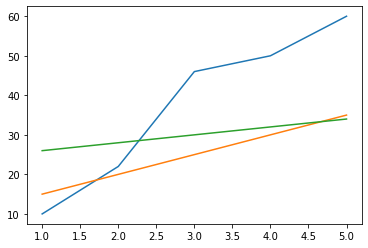

In [18]:
plt.plot([1, 2, 3, 4, 5], [10, 22, 46, 50, 60], label="Plot Line 1")
plt.plot([1, 2, 3, 4, 5], [15, 20 , 25, 30, 35], label="Plot Line 2")
plt.plot([1, 2, 3, 4, 5], [26, 28, 30, 32, 34], label="Plot Line 3")

__Stylize plots by adding labels, grid lines, titles, and legends.__  Each of these can be added as successive lines of codes.  

__Use '%matplotlib inline' before running code to generate a plot if using a Notebook__.  If you're trying to show a plot in a script or in the terminal, __use plt.show() at the end instead__.  

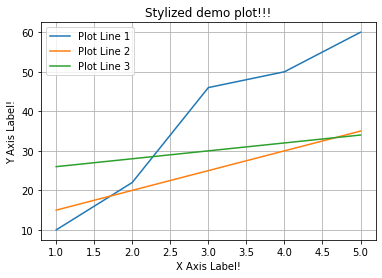

In [19]:
# Uncomment this if not in Notebook.  Removing 'inline' will cause the plot to appear in a new window
%matplotlib inline 
plt.plot([1, 2, 3, 4, 5], [10, 22, 46, 50, 60], label="Plot Line 1")
plt.plot([1, 2, 3, 4, 5], [15, 20 , 25, 30, 35], label="Plot Line 2")
plt.plot([1, 2, 3, 4, 5], [26, 28, 30, 32, 34], label="Plot Line 3")
plt.xlabel('X Axis Label!')
plt.ylabel('Y Axis Label!')
plt.title('Stylized demo plot!!!')
plt.grid(True)
plt.legend()
# plt.show() # Uncomment if running plot as a script or in terminal

__Use the .subplots() method to create subplots.__  Just specify an argument to denote the number of plots, and then provide a coordinate to the axes object to specify its placement.  

In the example below, we're __using the .scatter() method to make scatter plots__.  Just like __.plot() was used to make line plots__, there exist other methods to make other kinds of plots.  For example, we can __use .hist() to make histograms.__  

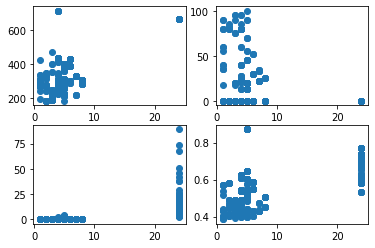

In [21]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(boston_complete['RAD'], boston_complete['TAX'], label='TAX')
axes[0, 1].scatter(boston_complete['RAD'], boston_complete['ZN'], label='ZN')
axes[1, 0].scatter(boston_complete['RAD'], boston_complete['CRIM'], label='CRIM')
axes[1, 1].scatter(boston_complete['RAD'], boston_complete['NOX'], label='NOX')
# change out using .hist to create a histogram

We can further __distinguish different lines on the same plots by changing color and defining shapes for each data point__.

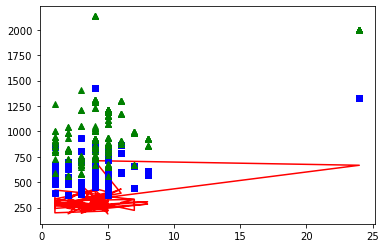

In [28]:
# Draw the graph with different styles for the points of each variable 
# plt.plot([1, 2, 3, 4, 5], [10, 22, 46, 50, 60], 'r-')
# plt.plot([1, 2, 3, 4, 5], [15, 20 , 25, 30, 35], 'bs')
# plt.plot([1, 2, 3, 4, 5], [26, 28, 30, 32, 34], 'g^')
plt.plot(boston_complete['RAD'], boston_complete['TAX'], 'r-')
plt.plot(boston_complete['RAD'], boston_complete['TAX']*2, 'bs')
plt.plot(boston_complete['RAD'], boston_complete['TAX']*3, 'g^')

__Use the .scatter() method to create scatter plots.__

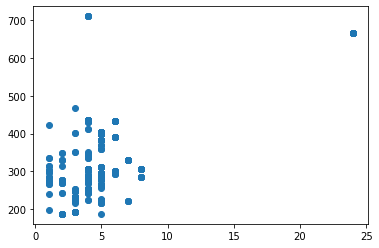

In [29]:
# scatter plot
plt.scatter(boston_complete['RAD'], boston_complete['TAX'])

__Use the .bar() method to create bar plots.__

<BarContainer object of 150 artists>

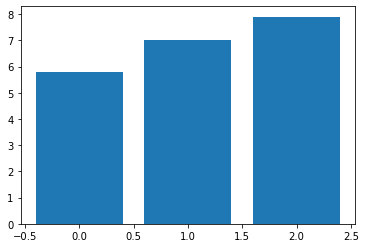

In [30]:
plt.bar(iris_complete['Class'], iris_complete['sepal length (cm)'])

__Use the .hist() method to make histograms.__

(array([ 5.,  6., 21., 13.,  7., 21., 10., 16., 16.,  7., 15.,  2.,  5.,
         1.,  5.]),
 array([4.3 , 4.54, 4.78, 5.02, 5.26, 5.5 , 5.74, 5.98, 6.22, 6.46, 6.7 ,
        6.94, 7.18, 7.42, 7.66, 7.9 ]),
 <a list of 15 Patch objects>)

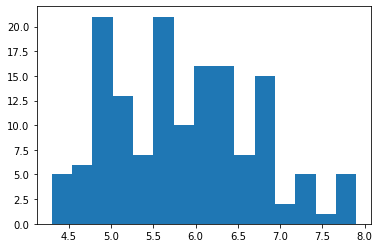

In [31]:
plt.hist(iris_complete['sepal length (cm)'], bins=15)

We can also add text and annotations to our plots.  Here, we __use the .annotate() method to add an arrow with an annotation.__  We also __use the .text() method to add a text annotation at a specific coordinate.__  

Text(3.5, 60, 'Notice Something?')

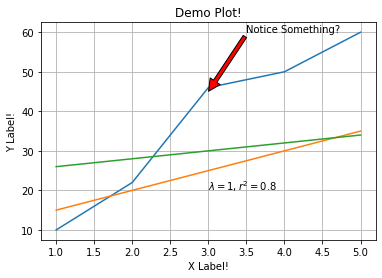

In [36]:
# Uncomment this if not in Notebook.  Removing 'inline' will cause the plot to appear in a new window
%matplotlib inline 
plt.plot([1, 2, 3, 4, 5], [10, 22, 46, 50, 60], label="Plot Line 1")
plt.plot([1, 2, 3, 4, 5], [15, 20 , 25, 30, 35], label="Plot Line 2")
plt.plot([1, 2, 3, 4, 5], [26, 28, 30, 32, 34], label="Plot Line 3")
plt.xlabel('X Label!')
plt.ylabel('Y Label!')
plt.title('Demo Plot!')
plt.grid(True)
plt.text(x=3, y=20, s=r'$\lambda=1, r^2=0.8$') 
plt.annotate('Notice Something?', xy=(3, 45), xytext=(3.5, 60), arrowprops={'facecolor': 'red', 'shrink':0.005})
# plt.show() # Uncomment if running plot as a script or in terminal

## Seaborn
Seaborn is a library based off of Matplotlib, and that works in conjunction with Matplotlib to produce charts that look much more visually appealing than what you could produce with just Matplotlib alone.  

Below, we demonstrate __creating a scatterplot with Seaborn by using the .scatterplot() method.__

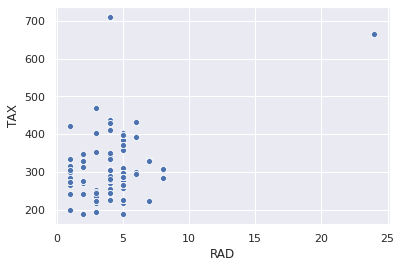

In [37]:
# import seaborn as sns 
sns.set() # sns.set is an alias for sns.set_theme(), which is used set multple theme parameters in one step.  
sns.scatterplot(boston_complete['RAD'], boston_complete['TAX'])

For more details on sns.set(), see https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme

__You can also create scatter or line plots with the .relplot() method.__  With this method, you also have the option of customizing stylings such as hue, color, and size.

See https://seaborn.pydata.org/generated/seaborn.relplot.html for more details. 

In the plot below, we plot sepal length in relation to sepal width, and we distinguish the data points by the Class of Iris that they belong to by using different colors, which is defined using the "hue" argument.  

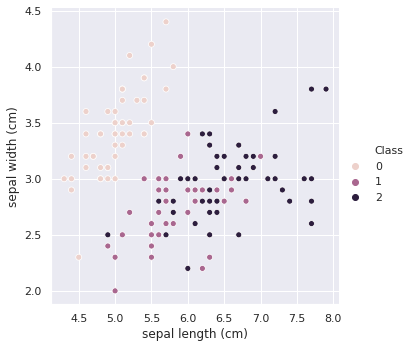

In [43]:
sns.relplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_complete, hue = 'Class')

We can also plot the three classes separately by setting the "col" argument equal to the "Class" target variable.  

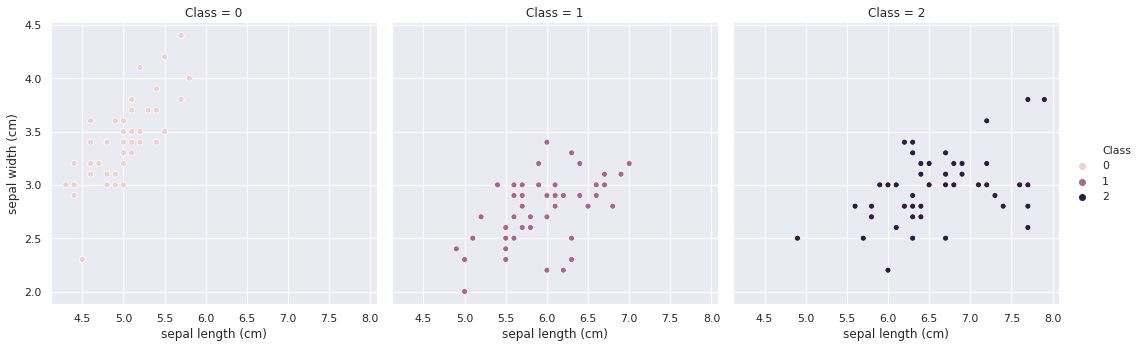

In [44]:
sns.relplot(x='sepal length (cm)', y ='sepal width (cm)', data=iris_complete, hue='Class', col='Class')

__Use the .heatmap() method to plot a correlation matrix!__  The .heatmap() method can be used with the .corr() method to create a correlation matrix that shows the level of correlation between variables between -1 (complete negative correlation) to 1 (complete positive correlation).

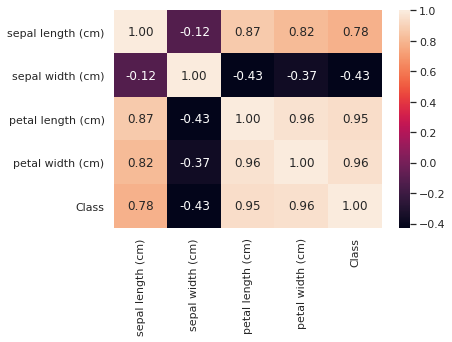

In [45]:
sns.heatmap(iris_complete.corr(), annot=True, fmt='.2f')

We can also __examine the relationships between variables by using the .pairplot()__ method to create a pairplot. 

See https://seaborn.pydata.org/generated/seaborn.pairplot.html

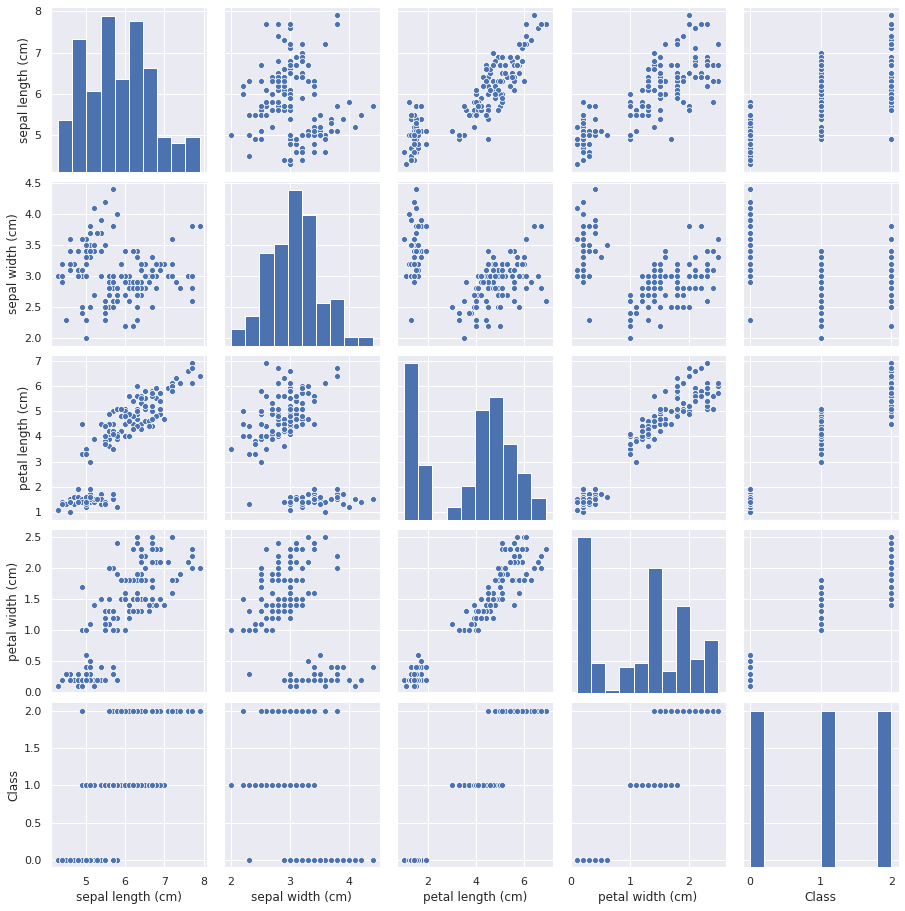

In [47]:
sns.pairplot(iris_complete)

By setting an argument for the hue parameter, we can distinguish between the three classes of Iris.  Notice that this version is a lot more compact, since we can combine multiple plots to save on space.

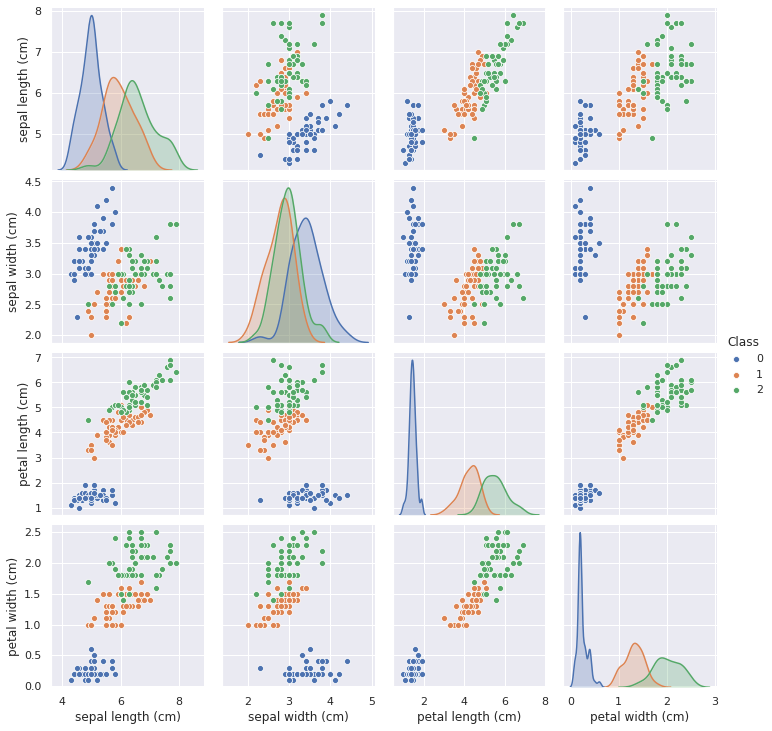

In [49]:
sns.pairplot(iris_complete, hue="Class")

We can __use Seaborn's .jointplot() method to create a joint plot.  Joint Plots are a convenient way to show a bivariate relationship between two variables and the univariate characteristics/distribution of the individual variables in the margins.__  

See AJ Pryor's blog post here: http://alanpryorjr.com/visualizations/seaborn/jointplot/jointplot/ or the official Seaborn documentation for more details here: http://seaborn.pydata.org/generated/seaborn.jointplot.html. 

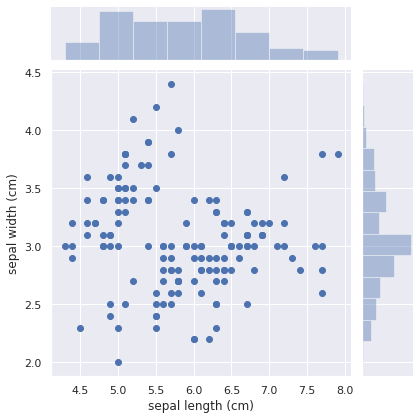

In [50]:
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_complete)

We can __use the .catplot() method to create Five Number Summary Plots, like Boxplots,__ or in this case, a Violin Plot, which is a sort of Boxplot that attempts to capture the probability density of the data at different values.  

See https://seaborn.pydata.org/generated/seaborn.catplot.html and https://en.wikipedia.org/wiki/Violin_plot

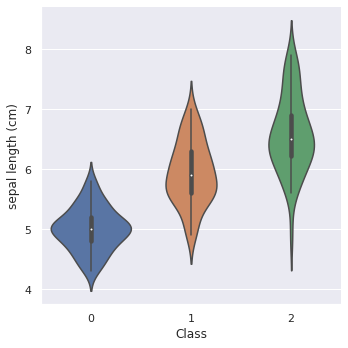

In [52]:
sns.catplot(x='Class', y='sepal length (cm)', kind='violin', data=iris_complete) # Use the 'kind' parameter to choose the kind of plot, e.g. 'box' for boxplot. 

__We can marry Matplotlib's ability to make subplots with Seaborn's visually appealing plots to create pretty subplots.__

Text(0.5, 1.0, 'Plot Two')

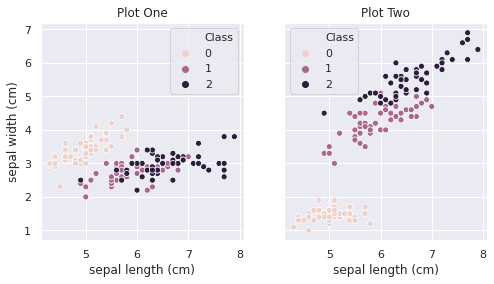

In [53]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Class', data=iris_complete, ax=axes[0])
axes[0].set_title("Plot One")
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue="Class", data=iris_complete, ax=axes[1])
axes[1].set_title("Plot Two")

## Conclusion
Pandas, Pandas Profiling, Matplotlib, and Seaborn provide powerful data analysis and data visualization tools that should make up the crux of your data science toolset when using Python.  While there is no real one-size-fits-all solution to data visualization, since other powerful tools like Bokeh, Pygal, and even ggplot2 via rpy2 exist and in certain cases may be even better suited than any of the ones focused on here, the four libraries (especially Pandas, Matplotlib, and Seaborn) are the ones that seem to get used most often.    

Each of these have a specific place in the data science workflow.  Pandas allows us to see the data in a clean, organized manner (compared to say, a numpy array representation), and can be combined with coloring and gradients in cells to draw attention to important data points, such as relative maxima and minima.  Pandas Profiling can be used to quickly generate HTML reports that can document summary statistics and relationships between variables, which is great if you don't want to spend all the time making the plots and computing the statistics yourself.  Matplotlib allows us to create the basic plots we need to visualize our data and get a quick, intuitive understanding of what's going on, while Seaborn provides many useful extensions to what Matplotlib can do while also adding an enhanced visual aesthetic that may look better in our final reports.    